In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [145]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
ax.set_yticks(())

[]

### Loading Data

['target_names', 'data', 'target', 'DESCR', 'feature_names']
(150L, 4L)
(150L,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 5.1  3.5  1.4  0.2]
----------------------------------------


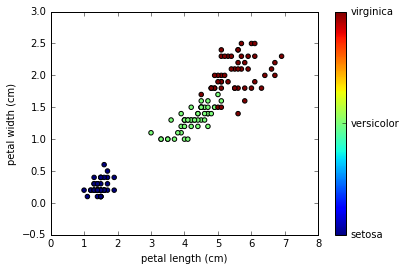

In [146]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

n_samples, n_features = iris.data.shape
print(iris.data.shape)
print(iris.target.shape)

print(iris.target_names)
print(iris.feature_names)
print(iris.data[0])
print("----------------------------------------")

%matplotlib inline
import matplotlib.pyplot as plt

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

x_index = 2
y_index = 3
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

['images', 'data', 'target_names', 'DESCR', 'target']
(1797L, 64L)
(1797L,)
[0 1 2 3 4 5 6 7 8 9]
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
----------------------------------------


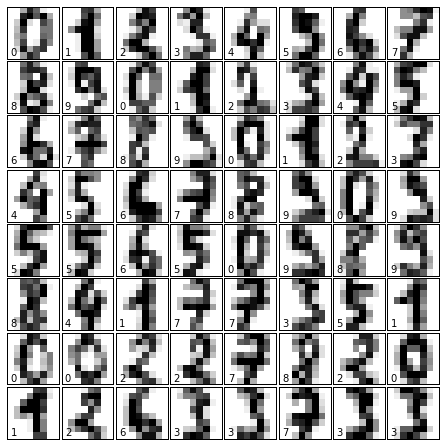

In [147]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

n_samples, n_features = digits.data.shape

print(digits.data.shape)
print(digits.target.shape)
print(digits.target_names)
print(digits.data[0])
print("----------------------------------------")

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [219]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

n_samples, n_features = boston.data.shape

print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
print(boston.data[0])
print("----------------------------------------")

['data', 'feature_names', 'DESCR', 'target']
(506L, 13L)
(506L,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
----------------------------------------


(1000L, 3L)
(1000L,)
----------------------------------------


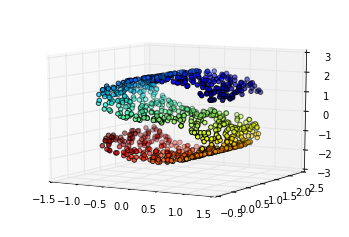

In [148]:
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples=1000)
print(data.shape)
print(colors.shape)

print("----------------------------------------")
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
ax.view_init(10, -60)


### Training & Splitting Data

In [149]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

print("----------------------------------------")
print(iris.keys())
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)
print(iris.data[0])
print("----------------------------------------")

----------------------------------------
['target_names', 'data', 'target', 'DESCR', 'feature_names']
(150L, 4L)
(150L,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 5.1  3.5  1.4  0.2]
----------------------------------------


In [150]:
# Randomize the data before doing split
rng = np.random.RandomState(0)
permutation = rng.permutation(len(X))

print("X:\n{0}".format(X[0]))
print("Y:\n{0}".format(y))

X, y = X[permutation], y[permutation]
print("Randomized X:\n{0}".format(X[0]))
print("Randomized Y:\n{0}".format(y))

X:
[ 5.1  3.5  1.4  0.2]
Y:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Randomized X:
[ 5.8  2.8  5.1  2.4]
Randomized Y:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


In [151]:
# Split the data - 60%
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.6, random_state=1999)

print("Labels for training and testing data")
print("\ntrain_y:\n{0}".format(train_y))
print("\ntest_y:\n{0}".format(test_y))

Labels for training and testing data

train_y:
[0 1 0 1 0 2 2 0 0 0 1 0 1 0 1 0 1 1 2 2 2 0 2 2 1 1 2 2 1 1 1 1 1 0 2 2 2
 1 0 2 1 1 2 1 0 2 2 0 2 2 0 2 1 0 2 0 2 2 2 0 2 0 0 1 0 1 0 2 1 1 0 1 2 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 2]

test_y:
[1 0 1 2 2 1 1 0 1 0 0 2 2 2 1 0 2 0 2 1 0 0 0 2 1 1 1 1 1 0 2 2 2 2 0 1 0
 1 2 1 2 2 1 2 2 1 0 2 0 2 1 2 0 0 2 0 2 1 2 1]


Fraction Correct
0.95
correct:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25
 26 27 28 29 30 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59]
incorrect:
[24 31 38]


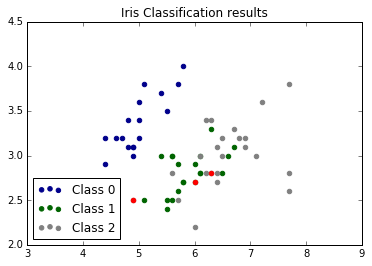

In [189]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Fraction Correct")
print(np.sum(pred_y == test_y) / float(len(test_y)))

correct_idx = np.where(pred_y == test_y)[0]
print("correct:\n{0}".format(correct_idx))

incorrect_idx = np.where(pred_y != test_y)[0]
print("incorrect:\n{0}".format(incorrect_idx))

# Plot two dimensions
colors = ["darkblue", "darkgreen", "grey"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 0], test_X[idx, 1], color=color, label="Class %s" % str(n))

plt.scatter(test_X[incorrect_idx, 0], test_X[incorrect_idx, 1], color="red")
plt.xlim(3, 9)
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

### Supervised - Classifications

In [190]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])


(100L, 2L)
(100L,)
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
[1 1 0 0 1]


(60L, 2L)
(60L,)
correct:
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 32 33 34 35 36 38 39]
incorrect:
[ 8 16 31 37]
score_test:0.9
score_train:0.933333333333
coefficient:[[ 1.18231732 -1.38746307]]
intercept:[ 1.58269039]


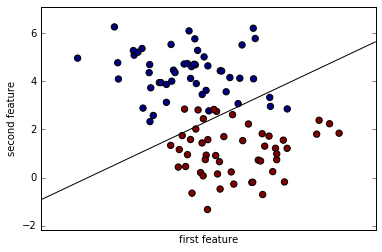

In [191]:
# Logistic Regression

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)
print(X_train.shape)
print(y_train.shape)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred_y = classifier.predict(X_test)

# Calculate Scores
fraction_correct = np.sum(pred_y == y_test) / float(len(test_y))
correct_idx = np.where(pred_y == y_test)[0]
incorrect_idx = np.where(pred_y != y_test)[0]

score = np.mean(pred_y == y_test)
score_test = classifier.score(X_test, y_test)
score_train = classifier.score(X_train, y_train)
coefficient = classifier.coef_
intercept = classifier.intercept_

print("correct:\n{0}".format(correct_idx))
print("incorrect:\n{0}".format(incorrect_idx))
print("score_test:{0}".format(score_test))
print("score_train:{0}".format(score_train))
print("coefficient:{0}".format(coefficient))
print("intercept:{0}".format(intercept))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)

(60L, 2L)
(60L,)
correct:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 32 33 34 35 36 37 38 39]
incorrect:
[16 31]
score_test:0.95
score_train:1.0


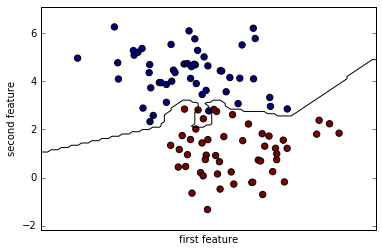

In [192]:
# KNN - 1 Neighbor

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)

print(X_train.shape)
print(y_train.shape)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
pred_y = classifier.predict(X_test)

# Calculate Scores
fraction_correct = np.sum(pred_y == y_test) / float(len(test_y))
correct_idx = np.where(pred_y == y_test)[0]
incorrect_idx = np.where(pred_y != y_test)[0]

score_test = classifier.score(X_test, y_test)
score_train = classifier.score(X_train, y_train)

print("correct:\n{0}".format(correct_idx))
print("incorrect:\n{0}".format(incorrect_idx))
print("score_test:{0}".format(score_test))
print("score_train:{0}".format(score_train))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X, fill=False)

(60L, 2L)
(60L,)
correct:
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
incorrect:
[8]
score_test:0.975
score_train:0.966666666667


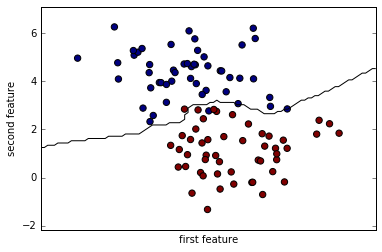

In [193]:
# KNN - 3 Neighbors

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)

print(X_train.shape)
print(y_train.shape)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
pred_y = classifier.predict(X_test)

# Calculate Scores
fraction_correct = np.sum(pred_y == y_test) / float(len(test_y))
correct_idx = np.where(pred_y == y_test)[0]
incorrect_idx = np.where(pred_y != y_test)[0]

score_test = classifier.score(X_test, y_test)
score_train = classifier.score(X_train, y_train)

print("correct:\n{0}".format(correct_idx))
print("incorrect:\n{0}".format(incorrect_idx))
print("score_test:{0}".format(score_test))
print("score_train:{0}".format(score_train))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X, fill=False)

### Supervised - Regressions

#### Linear Regression

One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. One way to find such a line is LinearRegression (also known as ordinary least squares).
The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classes.

(100L,)
(100L, 1L)


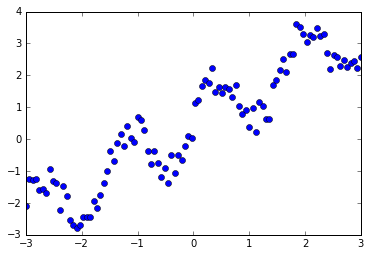

In [201]:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.plot(x, y, 'o')

print(x.shape)
X = x[:, np.newaxis]
print(X.shape)

correct:
[]
incorrect:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
score_test:0.791485416667
score_train:0.825304628253


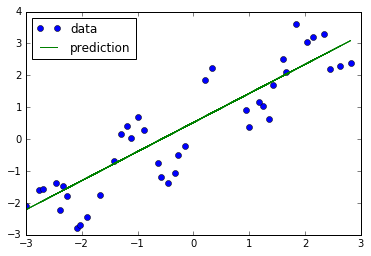

In [214]:
# Linear Regression

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#y_pred_train = regressor.predict(X_train)
#plt.plot(X_train, y_train, 'o', label="data")
#plt.plot(X_train, y_pred_train, '-', label="prediction")
#plt.legend(loc='best')

pred_y = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, pred_y, '-', label="prediction")
plt.legend(loc='best')

# Calculate Scores
fraction_correct = np.sum(pred_y == y_test) / float(len(test_y))
correct_idx = np.where(pred_y == y_test)[0]
incorrect_idx = np.where(pred_y != y_test)[0]

score_test = regressor.score(X_test, y_test)
score_train = regressor.score(X_train, y_train)

print("correct:\n{0}".format(correct_idx))
print("incorrect:\n{0}".format(incorrect_idx))
print("score_test:{0}".format(score_test))
print("score_train:{0}".format(score_train))

correct:
[]
incorrect:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
score_test:0.791485416667
score_train:0.825304628253


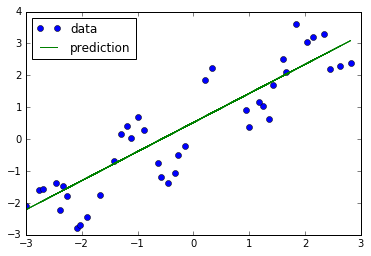

In [217]:
# K-Neighbor Regression
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

k=3
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

pred_y = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, pred_y, '-', label="prediction")
plt.legend(loc='best')

# Calculate Scores
fraction_correct = np.sum(pred_y == y_test) / float(len(test_y))
correct_idx = np.where(pred_y == y_test)[0]
incorrect_idx = np.where(pred_y != y_test)[0]

score_test = regressor.score(X_test, y_test)
score_train = regressor.score(X_train, y_train)

print("correct:\n{0}".format(correct_idx))
print("incorrect:\n{0}".format(incorrect_idx))
print("score_test:{0}".format(score_test))
print("score_train:{0}".format(score_train))

['data', 'feature_names', 'DESCR', 'target']
(506L, 13L)
(506L,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
----------------------------------------
correct:
[ 19  29 110 150 174]
incorrect:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135

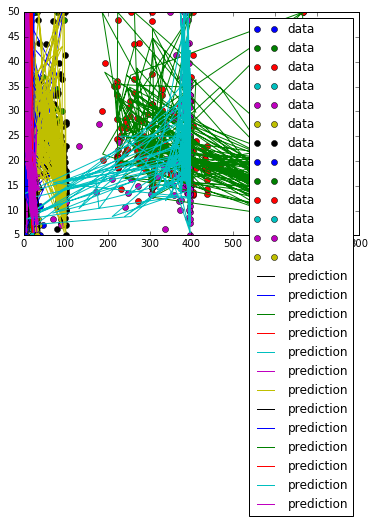

In [229]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

n_samples, n_features = boston.data.shape
X, y = boston.data, boston.target

print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
print(boston.data[0])
print("----------------------------------------")

# Randomize the data before doing split
rng = np.random.RandomState(0)
permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]

#print("X:\n{0}".format(X[0]))
#print("Y:\n{0}".format(y))
#print("Randomized X:\n{0}".format(X[0]))
#print("Randomized Y:\n{0}".format(y))

# Split the data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

# Apply K-Neighbors Regression
K=1
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=K)
regressor.fit(X_train, y_train)

pred_y = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, pred_y, '-', label="prediction")
plt.legend(loc='best')

# Calculate Scores
fraction_correct = np.sum(pred_y == y_test) / float(len(test_y))
correct_idx = np.where(pred_y == y_test)[0]
incorrect_idx = np.where(pred_y != y_test)[0]

score_test = regressor.score(X_test, y_test)
score_train = regressor.score(X_train, y_train)

print("correct:\n{0}".format(correct_idx))
print("incorrect:\n{0}".format(incorrect_idx))
print("score_test:{0}".format(score_test))
print("score_train:{0}".format(score_train))

In [242]:
import pandas as pd
df = pd.DataFrame(X_test)
df.columns = boston.feature_names
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
198,0.03932,0.0,3.41,0.0,0.489,6.405,73.9,3.0921,2.0,270.0,17.8,393.55,8.20
199,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
200,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
201,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
202,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67
